In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import seaborn as sns

In [2]:
df = pd.read_csv('train_data_openiit.csv')

In [3]:
df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


## EDA

In [4]:

df.describe()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min
count,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000
mean,8094.034350,0.430578,0.556353,0.522129,0.149321,5.205202,0.201365,-10.668687,0.097680,118.167495,0.525300,1984.517298,3.888133
std,4690.929822,0.366893,0.175373,0.262482,0.297954,3.526954,0.173987,5.506888,0.155895,30.200064,0.258205,25.911998,2.383133
min,1.000000,0.000001,0.000000,0.000020,0.000000,0.000000,0.014700,-43.738000,0.000000,0.000000,0.000000,1920.000000,0.200000
25%,4026.000000,0.058950,0.438000,0.303000,0.000000,2.000000,0.096200,-13.656000,0.034700,95.050500,0.321000,1966.000000,2.900000
50%,8093.000000,0.354000,0.569000,0.534000,0.000115,5.000000,0.132000,-9.584000,0.045600,116.915000,0.532000,1987.000000,3.600000
75%,12180.000000,0.805000,0.685000,0.739000,0.055650,8.000000,0.252000,-6.571500,0.078900,136.108500,0.737000,2008.000000,4.400000
max,16227.000000,0.996000,0.980000,1.000000,1.000000,11.000000,0.997000,1.006000,0.968000,216.843000,1.000000,2021.000000,72.800000


<AxesSubplot:xlabel='popularity', ylabel='count'>

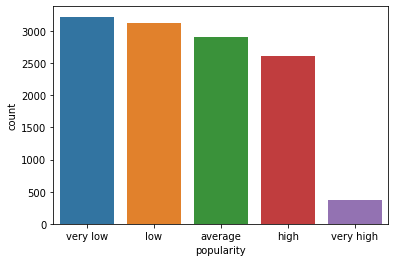

In [5]:
sns.countplot(x = df['popularity']) # WE SEE HILGHLY IMBALANCED DATA FOR VERY HIGH SO WE NEED TO OVERSAMPLE DATA TO MATCH OTHER CATEGORIES

## visulaizing categorical variables

In [6]:
#mapping popularity feature to int categories
def map_pop_func(element):
  if element == 'very low':
    return 0
  elif element == 'low':
    return 1
  elif element == 'average':
    return 2
  elif element == 'high':
    return 3
  elif element == 'very high':
    return 4

In [7]:
df['popularity'] = df['popularity'].map(map_pop_func) 
# WE first map the string target column so that we can get mathematical intution
# also it is categorized in such a way that higher means better

<AxesSubplot:xlabel='explicit', ylabel='count'>

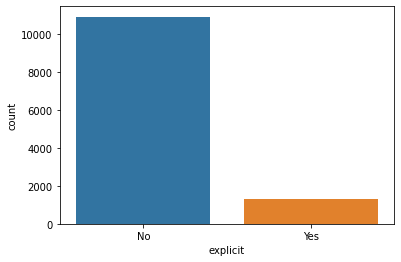

In [8]:
sns.countplot( x = df['explicit'])

In [9]:
df.groupby('explicit').median()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,popularity
explicit,,,,,,,,,,,,,,
No,8055,0.424,0.553,0.513,0.000257,5,0.131,-10.043,0.043,116.6095,0.540,1984,3.5,1
Yes,8398,0.101,0.704,0.638,0.000000,6,0.146,-6.711,0.172,119.7050,0.487,2014,3.6,3


In [10]:
df.groupby('explicit').mean()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,popularity
explicit,,,,,,,,,,,,,,
No,8079.112965,0.459520,0.541015,0.510680,0.164431,5.192555,0.200002,-11.010539,0.079324,117.813299,0.530252,1982.122593,3.918852,1.384926
Yes,8217.223316,0.191643,0.682974,0.616648,0.024572,5.309614,0.212618,-7.846401,0.249227,121.091693,0.484417,2004.287661,3.634519,2.370931


##  we can see from above dataframes that :-
### 1) Explicit songs have higher popularity.
### 2) Earlier less explicit songs was produced.
### 3) Explicit songs have considerabely less acoustic level, instrumentalness.
### 4)  Explicit songs have considerabely higher speechiness level.

<AxesSubplot:xlabel='popularity', ylabel='count'>

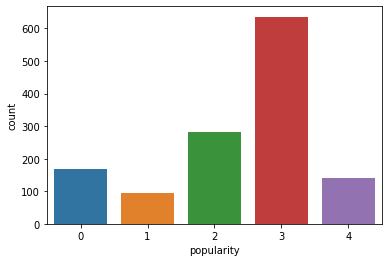

In [11]:
sns.countplot(x = df[df['explicit'] == 'Yes']['popularity']) 

<AxesSubplot:xlabel='popularity', ylabel='count'>

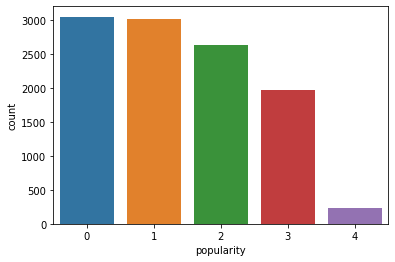

In [12]:
sns.countplot(x = df[df['explicit'] == 'No']['popularity'])

In [13]:
df.groupby(['year', 'explicit']).count()

id  acousticness  danceability  energy  instrumentalness  key  \
year explicit                                                                   
1920 No         12            12            12      12                12   12   
     Yes         1             1             1       1                 1    1   
1921 No          4             4             4       4                 4    4   
1922 No          5             5             5       5                 5    5   
1923 No          5             5             5       5                 5    5   
...            ...           ...           ...     ...               ...  ...   
2019 Yes       104           104           104     104               104  104   
2020 No        276           276           276     276               276  276   
     Yes       190           190           190     190               190  190   
2021 No         91            91            91      91                91   91   
     Yes        20            20            20      20                20   20   

               liveness  loudness  mode  release_date  speechiness  tempo  \
year explicit                                                               
1920 No              12        12    12            12           12     12   
     Yes              1         1     1             1            1      1   
1921 No               4         4     4             4            4      4   
1922 No               5         5     5             5            5      5   
1923 No               5         5     5             5            5      5   
...                 ...       ...   ...           ...          ...    ...   
2019 Yes            104       104   104           104          104    104   
2020 No             276       276   276           276          276    276   
     Yes            190       190   190           190          190    190   
2021 No              91        91    91            91           91     91   
     Yes             20        20    20            20           20     20   

               valence  duration-min  popularity  
year explicit                                     
1920 No             12            12          12  
     Yes             1             1           1  
1921 No              4             4           4  
1922 No              5             5           5  
1923 No              5             5           5  
...                ...           ...         ...  
2019 Yes           104           104         104  
2020 No            276           276         276  
     Yes           190           190         190  
2021 No             91            91          91  
     Yes            20            20          20  

[162 rows x 15 columns]

In [14]:
df.groupby(['year', 'explicit']).count()['id'].loc[1920].loc['Yes']

1

In [15]:
for year, explicit in df.groupby(['year', 'explicit']).count()['id'].index :
    print(year, explicit)

1920 No
1920 Yes
1921 No
1922 No
1923 No
1924 No
1925 No
1926 No
1926 Yes
1927 No
1927 Yes
1928 No
1929 No
1929 Yes
1930 No
1931 No
1931 Yes
1932 No
1933 No
1934 No
1935 No
1935 Yes
1936 No
1937 No
1938 No
1939 No
1940 No
1940 Yes
1941 No
1942 No
1943 No
1944 No
1945 No
1945 Yes
1946 No
1946 Yes
1947 No
1948 No
1948 Yes
1949 No
1950 No
1950 Yes
1951 No
1952 No
1952 Yes
1953 No
1953 Yes
1954 No
1955 No
1956 No
1957 No
1958 No
1959 No
1960 No
1961 No
1962 No
1963 No
1964 No
1965 No
1965 Yes
1966 No
1967 No
1968 No
1969 No
1970 No
1971 No
1972 No
1973 No
1974 No
1975 No
1976 No
1976 Yes
1977 No
1977 Yes
1978 No
1978 Yes
1979 No
1979 Yes
1980 No
1980 Yes
1981 No
1981 Yes
1982 No
1982 Yes
1983 No
1983 Yes
1984 No
1984 Yes
1985 No
1985 Yes
1986 No
1986 Yes
1987 No
1987 Yes
1988 No
1988 Yes
1989 No
1989 Yes
1990 No
1990 Yes
1991 No
1991 Yes
1992 No
1992 Yes
1993 No
1993 Yes
1994 No
1994 Yes
1995 No
1995 Yes
1996 No
1996 Yes
1997 No
1997 Yes
1998 No
1998 Yes
1999 No
1999 Yes
2000 No
2000 Yes
2

In [16]:
def percentage_explicit_year_wise(df):
    year_explicit = {}
    df1 = df.groupby(['year', 'explicit']).count()['id']
    
    for year, explicit in df1.index : #looping over different year
        
        try: 
            explicit_songs = df1.loc[year].loc['Yes']
        
        except:
            explicit_songs = 0
            
        try: 
            non_explicit_songs = df1.loc[year].loc['No']
        
        except:
            non_explicit_songs = 0
            
        
        per_explicit = np.round(100*(explicit_songs/(explicit_songs+non_explicit_songs)), decimals = 1)
        
        year_explicit[year] = per_explicit
    
    return year_explicit

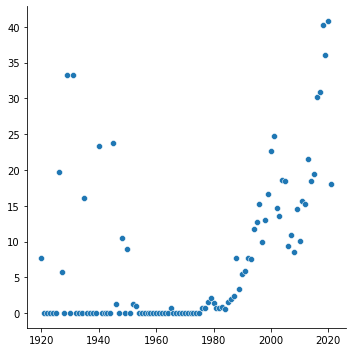

In [17]:
sns.relplot(x = percentage_explicit_year_wise(df).keys(),y=  percentage_explicit_year_wise(df).values())

In [18]:
year_explicit = percentage_explicit_year_wise(df)

In [19]:

# google some about dirty blues band which release many popular expliccit tracks which is the cause of some anomoiles in 1920-1970

In [20]:
year_explicit

{1920: 7.7,
 1921: 0.0,
 1922: 0.0,
 1923: 0.0,
 1924: 0.0,
 1925: 0.0,
 1926: 19.7,
 1927: 5.7,
 1928: 0.0,
 1929: 33.3,
 1930: 0.0,
 1931: 33.3,
 1932: 0.0,
 1933: 0.0,
 1934: 0.0,
 1935: 16.1,
 1936: 0.0,
 1937: 0.0,
 1938: 0.0,
 1939: 0.0,
 1940: 23.4,
 1941: 0.0,
 1942: 0.0,
 1943: 0.0,
 1944: 0.0,
 1945: 23.7,
 1946: 1.3,
 1947: 0.0,
 1948: 10.5,
 1949: 0.0,
 1950: 8.9,
 1951: 0.0,
 1952: 1.3,
 1953: 1.0,
 1954: 0.0,
 1955: 0.0,
 1956: 0.0,
 1957: 0.0,
 1958: 0.0,
 1959: 0.0,
 1960: 0.0,
 1961: 0.0,
 1962: 0.0,
 1963: 0.0,
 1964: 0.0,
 1965: 0.7,
 1966: 0.0,
 1967: 0.0,
 1968: 0.0,
 1969: 0.0,
 1970: 0.0,
 1971: 0.0,
 1972: 0.0,
 1973: 0.0,
 1974: 0.0,
 1975: 0.0,
 1976: 0.7,
 1977: 0.7,
 1978: 1.5,
 1979: 2.1,
 1980: 1.4,
 1981: 0.7,
 1982: 0.7,
 1983: 0.8,
 1984: 0.6,
 1985: 1.5,
 1986: 2.0,
 1987: 2.4,
 1988: 7.7,
 1989: 3.4,
 1990: 5.5,
 1991: 5.9,
 1992: 7.7,
 1993: 7.6,
 1994: 11.8,
 1995: 12.7,
 1996: 15.3,
 1997: 9.9,
 1998: 13.0,
 1999: 16.6,
 2000: 22.7,
 2001: 24.8,
 2

## Lets visulaize mode

<AxesSubplot:xlabel='mode', ylabel='count'>

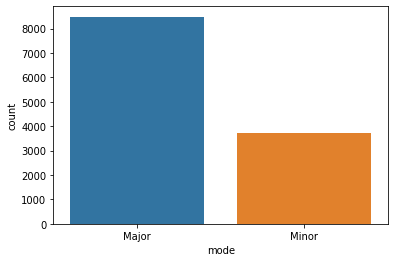

In [21]:
sns.countplot(x = df['mode'])

<AxesSubplot:xlabel='popularity', ylabel='count'>

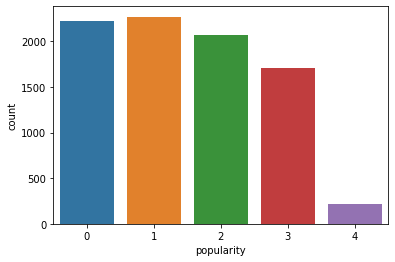

In [22]:
sns.countplot(x = df[df['mode'] == 'Major']['popularity'])

<AxesSubplot:xlabel='popularity', ylabel='count'>

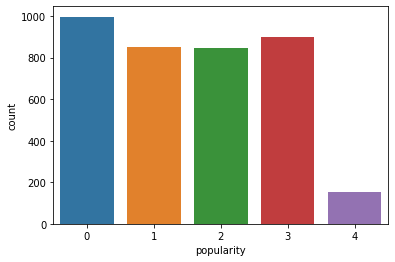

In [23]:
sns.countplot(x = df[df['mode'] == 'Minor']['popularity'])

### Lets binarize the categorical variables mode and explict

In [24]:
df['mode'] = df['mode'].map(lambda x : 1 if x == 'Major' else 0)

In [25]:
df['explicit'] = df['explicit'].map(lambda x : 1 if x == 'Yes' else 0)

In [26]:
df.tail()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
12222,15343,0.0408,0.8090,0.801,0,0.000000,1,0.353,-5.461,1,01-07-2014,0.4070,81.940,0.74400,2014,3.4,2
12223,1701,0.9120,0.4510,0.240,0,0.000002,1,0.175,-14.014,1,01-01-1959,0.0351,134.009,0.70100,1959,2.0,4
12224,3351,0.3280,0.5510,0.564,0,0.002950,2,0.352,-9.298,0,01-01-1984,0.0338,124.883,0.89000,1984,2.5,1
12225,8879,0.1220,0.0608,0.939,0,0.991000,1,0.912,-26.324,1,09-01-2017,0.1180,73.234,0.00558,2017,3.1,3
12226,9711,0.0380,0.3890,0.768,1,0.000000,1,0.119,-4.765,1,24-07-2020,0.2560,90.146,0.33400,2020,3.1,3


<AxesSubplot:xlabel='key', ylabel='count'>

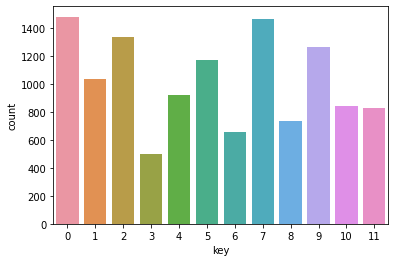

In [27]:
sns.countplot(x = df['key']) #visulaizing key feature

In [28]:
df.groupby('key').median()

,id,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,popularity
key,,,,,,,,,,,,,,,
0,8052.0,0.3970,0.5640,0.4970,0.0,0.000153,0.1320,-10.1520,1.0,0.04380,116.3420,0.5250,1984.0,3.50,1.0
1,8095.0,0.1930,0.6040,0.5840,0.0,0.000020,0.1300,-8.6640,1.0,0.05640,117.8110,0.5010,1997.0,3.60,2.0
2,8129.0,0.3620,0.5570,0.5365,0.0,0.000199,0.1340,-9.9050,1.0,0.04205,116.3675,0.5400,1984.0,3.60,1.0
3,8148.0,0.7540,0.5270,0.3820,0.0,0.000266,0.1330,-11.2720,1.0,0.04240,115.6360,0.4845,1975.0,3.35,1.0
4,8173.0,0.3050,0.5580,0.5490,0.0,0.000314,0.1420,-9.1920,1.0,0.04320,116.3220,0.5160,1988.0,3.60,2.0
5,7672.5,0.5565,0.5670,0.4785,0.0,0.000169,0.1320,-10.4615,1.0,0.04445,113.6525,0.5400,1982.0,3.50,1.0
6,7733.0,0.1890,0.5870,0.6110,0.0,0.000050,0.1340,-8.0560,1.0,0.05390,118.7310,0.5340,1997.0,3.50,2.0
7,8110.0,0.3360,0.5670,0.5475,0.0,0.000080,0.1340,-9.6230,1.0,0.04345,117.9910,0.5570,1986.0,3.50,1.0
8,8419.5,0.4280,0.5700,0.5040,0.0,0.000109,0.1230,-9.3045,1.0,0.04865,118.0515,0.5250,1990.5,3.50,2.0


In [29]:
df = df.drop(['id', 'key'], axis = 1)

In [30]:
df.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,0.949,0.235,0.0276,0,0.9270,0.513,-27.398,1,01-01-1947,0.0381,110.838,0.0398,1947,3.0,0
1,0.855,0.456,0.4850,0,0.0884,0.151,-10.046,1,13-11-2020,0.0437,152.066,0.8590,2020,2.4,1
2,0.827,0.495,0.4990,0,0.0000,0.401,-8.009,0,01-01-1950,0.0474,108.004,0.7090,1950,2.6,0
3,0.654,0.643,0.4690,0,0.1080,0.218,-15.917,1,30-04-1974,0.0368,83.636,0.9640,1974,2.4,1
4,0.738,0.705,0.3110,0,0.0000,0.322,-12.344,1,01-01-1973,0.0488,117.260,0.7850,1973,3.4,2


## Now lets visulaize continous variables

<AxesSubplot:>

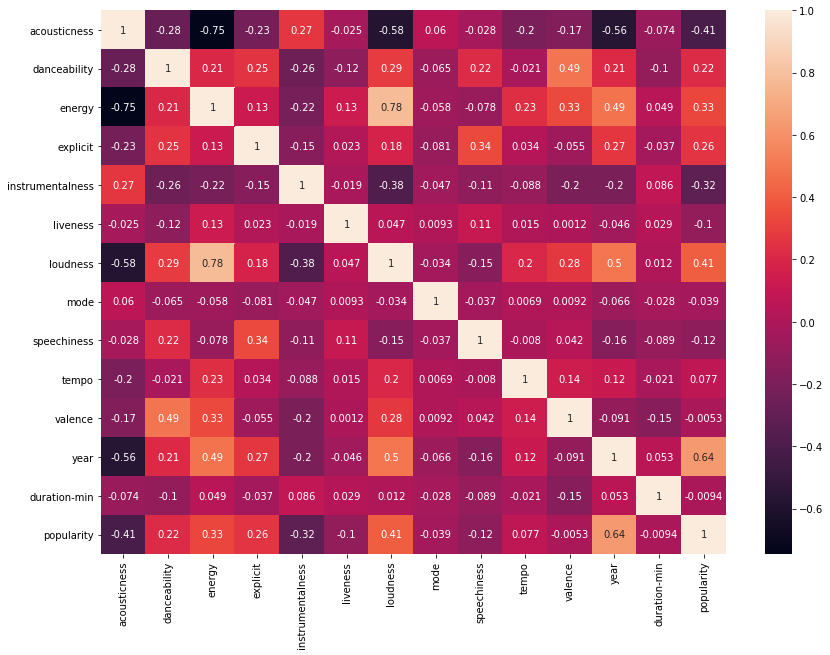

In [31]:
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), cmap = 'rocket', annot = True, )

In [32]:
df.corr()['popularity'].sort_values()

acousticness       -0.407964
instrumentalness   -0.317268
speechiness        -0.122614
liveness           -0.103116
mode               -0.039218
duration-min       -0.009381
valence            -0.005329
tempo               0.076751
danceability        0.220554
explicit            0.260153
energy              0.327218
loudness            0.413219
year                0.635493
popularity          1.000000
Name: popularity, dtype: float64

### We see positive corr of popularity with year(latest songs have higher popularity), loudness, energy, danceability
### Also we se negative corr of popularity with acousticness, instrumentalness, speechiness, liveness

In [33]:
df.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,0.949,0.235,0.0276,0,0.9270,0.513,-27.398,1,01-01-1947,0.0381,110.838,0.0398,1947,3.0,0
1,0.855,0.456,0.4850,0,0.0884,0.151,-10.046,1,13-11-2020,0.0437,152.066,0.8590,2020,2.4,1
2,0.827,0.495,0.4990,0,0.0000,0.401,-8.009,0,01-01-1950,0.0474,108.004,0.7090,1950,2.6,0
3,0.654,0.643,0.4690,0,0.1080,0.218,-15.917,1,30-04-1974,0.0368,83.636,0.9640,1974,2.4,1
4,0.738,0.705,0.3110,0,0.0000,0.322,-12.344,1,01-01-1973,0.0488,117.260,0.7850,1973,3.4,2


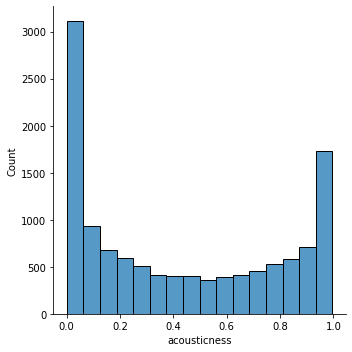

In [34]:
sns.displot(x = df['acousticness'])

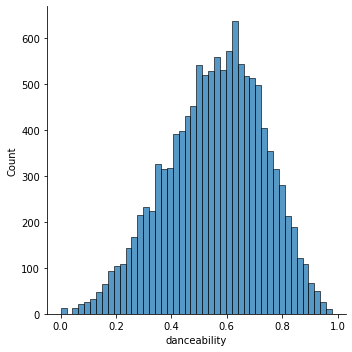

In [35]:
sns.displot(x = df['danceability'])

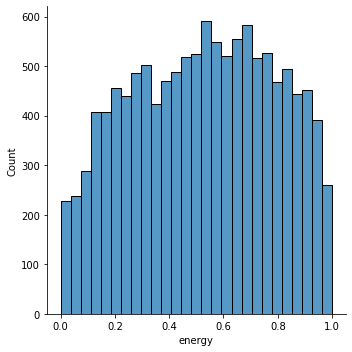

In [36]:
sns.displot(x = df['energy'])

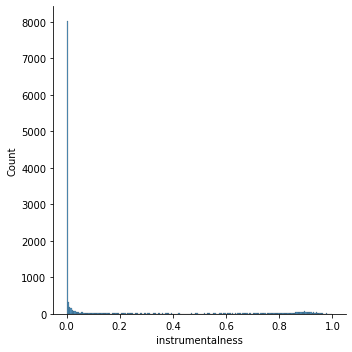

In [37]:
sns.displot(x = df['instrumentalness']) #this is highlly skewed and can be treated as catgeorical varibles

In [38]:
df[(df['instrumentalness']> 0 ) & (df['instrumentalness'] < 0.06)]

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
5,0.898000,0.498,0.442,0,0.003190,0.0974,-9.481,1,01-01-1968,0.0337,109.619,0.355,1968,2.6,1
6,0.259000,0.620,0.758,0,0.001320,0.4160,-8.183,1,13-11-1942,0.0343,119.258,0.912,1942,2.4,0
11,0.000034,0.496,0.834,0,0.034400,0.1270,-6.626,0,14-12-2018,0.0521,131.998,0.484,2018,1.5,0
12,0.087800,0.628,0.685,0,0.013600,0.0542,-14.747,1,01-11-1969,0.0350,134.324,0.813,1969,3.4,1
13,0.624000,0.660,0.746,0,0.000001,0.9460,-7.696,0,01-01-1980,0.0400,123.747,0.797,1980,4.1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12210,0.000568,0.392,0.993,0,0.006700,0.2720,-2.535,1,01-01-2004,0.1340,95.298,0.351,2004,5.3,2
12211,0.674000,0.333,0.203,0,0.057300,0.0791,-18.552,0,01-01-1962,0.0337,171.648,0.512,1962,5.8,0
12220,0.263000,0.653,0.609,0,0.001010,0.2330,-7.519,0,26-06-2001,0.0370,95.982,0.482,2001,3.5,3
12223,0.912000,0.451,0.240,0,0.000002,0.1750,-14.014,1,01-01-1959,0.0351,134.009,0.701,1959,2.0,4


In [39]:
df['instru_cat'] = df['instrumentalness'].map(lambda x: 0 if x < 0.06 else 1)

In [40]:
df.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,instru_cat
0,0.949,0.235,0.0276,0,0.9270,0.513,-27.398,1,01-01-1947,0.0381,110.838,0.0398,1947,3.0,0,1
1,0.855,0.456,0.4850,0,0.0884,0.151,-10.046,1,13-11-2020,0.0437,152.066,0.8590,2020,2.4,1,1
2,0.827,0.495,0.4990,0,0.0000,0.401,-8.009,0,01-01-1950,0.0474,108.004,0.7090,1950,2.6,0,0
3,0.654,0.643,0.4690,0,0.1080,0.218,-15.917,1,30-04-1974,0.0368,83.636,0.9640,1974,2.4,1,1
4,0.738,0.705,0.3110,0,0.0000,0.322,-12.344,1,01-01-1973,0.0488,117.260,0.7850,1973,3.4,2,0


<AxesSubplot:xlabel='instru_cat', ylabel='count'>

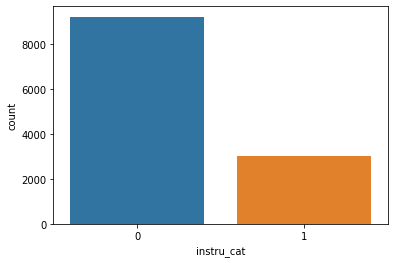

In [41]:
sns.countplot(x = df['instru_cat'])

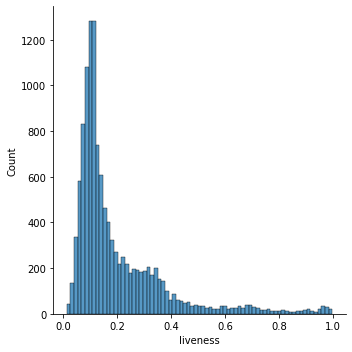

In [42]:
sns.displot(df['liveness'])

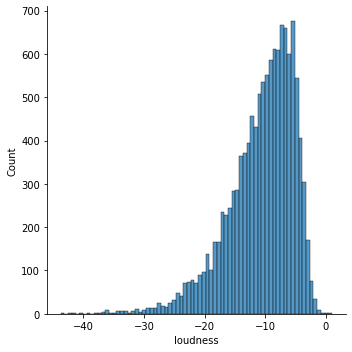

In [43]:
sns.displot(df['loudness'])

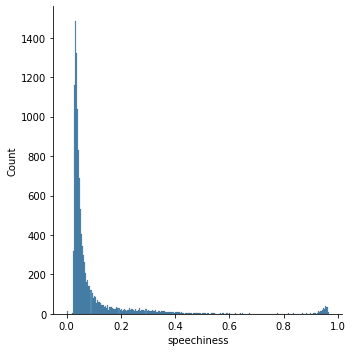

In [44]:
sns.displot(df['speechiness'])

In [45]:
# we dont see duration-min as important feature so lets drop it

In [46]:
df = df.drop('duration-min', axis = 1)

In [47]:
df.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,popularity,instru_cat
0,0.949,0.235,0.0276,0,0.9270,0.513,-27.398,1,01-01-1947,0.0381,110.838,0.0398,1947,0,1
1,0.855,0.456,0.4850,0,0.0884,0.151,-10.046,1,13-11-2020,0.0437,152.066,0.8590,2020,1,1
2,0.827,0.495,0.4990,0,0.0000,0.401,-8.009,0,01-01-1950,0.0474,108.004,0.7090,1950,0,0
3,0.654,0.643,0.4690,0,0.1080,0.218,-15.917,1,30-04-1974,0.0368,83.636,0.9640,1974,1,1
4,0.738,0.705,0.3110,0,0.0000,0.322,-12.344,1,01-01-1973,0.0488,117.260,0.7850,1973,2,0


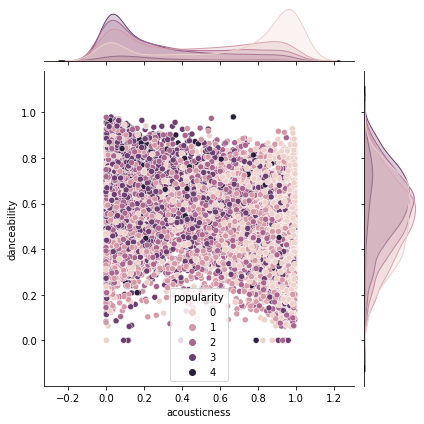

In [48]:
sns.jointplot(x = df['acousticness'], y = df['danceability'],  hue = df['popularity'])

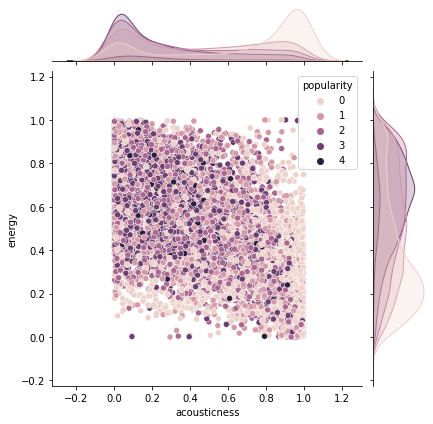

In [49]:
sns.jointplot(x = df['acousticness'], y = df['energy'], hue = df['popularity'])

In [50]:
df.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,popularity,instru_cat
0,0.949,0.235,0.0276,0,0.9270,0.513,-27.398,1,01-01-1947,0.0381,110.838,0.0398,1947,0,1
1,0.855,0.456,0.4850,0,0.0884,0.151,-10.046,1,13-11-2020,0.0437,152.066,0.8590,2020,1,1
2,0.827,0.495,0.4990,0,0.0000,0.401,-8.009,0,01-01-1950,0.0474,108.004,0.7090,1950,0,0
3,0.654,0.643,0.4690,0,0.1080,0.218,-15.917,1,30-04-1974,0.0368,83.636,0.9640,1974,1,1
4,0.738,0.705,0.3110,0,0.0000,0.322,-12.344,1,01-01-1973,0.0488,117.260,0.7850,1973,2,0


In [51]:
df.groupby('popularity').mean()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,year,instru_cat
popularity,,,,,,,,,,,,,
0,0.675366,0.520676,0.382525,0.052142,0.301623,0.222676,-13.562435,0.690565,0.152748,114.329021,0.504387,1962.895096,0.446617
1,0.433729,0.524569,0.515177,0.030148,0.149813,0.215004,-11.731436,0.727710,0.068724,118.651937,0.549804,1978.349583,0.270045
2,0.330648,0.566693,0.585875,0.096497,0.092348,0.186065,-9.537759,0.710165,0.072384,118.690602,0.545487,1992.094437,0.174451
3,0.258232,0.610257,0.620920,0.244052,0.043484,0.180237,-7.631583,0.655027,0.091318,121.448019,0.503249,2005.756715,0.084421
4,0.272311,0.674146,0.599090,0.384824,0.012360,0.169975,-6.795092,0.590786,0.106060,120.294152,0.497270,2015.636856,0.043360


### From above data frame we can clearly see the trends:
1) on increasing acousticness popularity decreases significantly.                                                                 
2) on increasing danceability popularity increases.                               
3) on increasing energy popularity increases.                                    
4) on increasing instrumentalness popularity decreases significantly.             
5) on increasing liveliness popularity decreases.                                   
6) on increasing loudness popularity increases.                                     
7) latest tracks have high popularity.                                               


## Now lets see how diffrent features varies with time

<AxesSubplot:xlabel='year', ylabel='acousticness'>

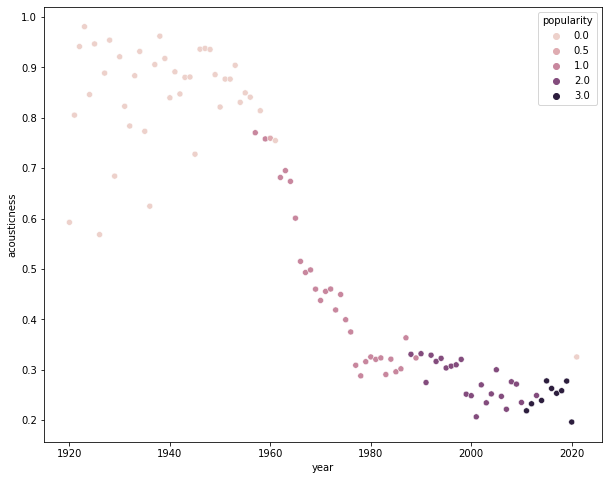

In [52]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = df.groupby('year').mean().index, y = df.groupby('year').mean()['acousticness'], hue = df.groupby('year').median()['popularity'], )

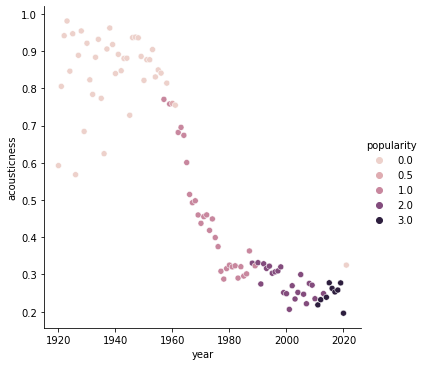

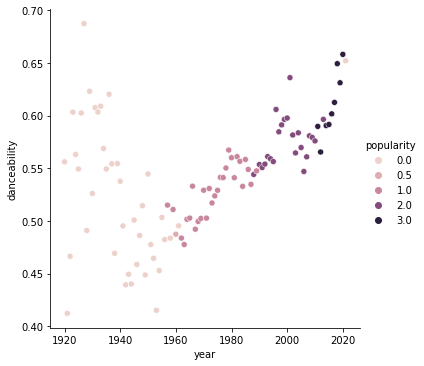

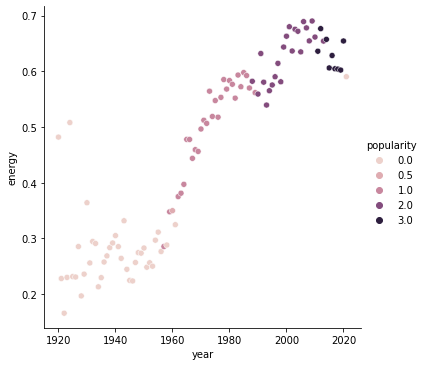

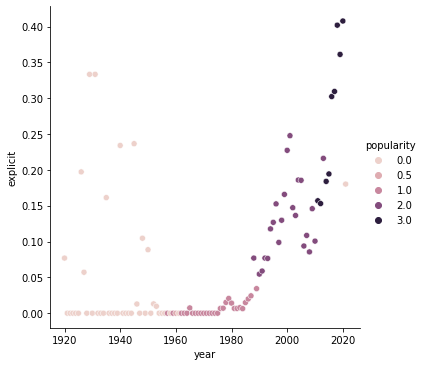

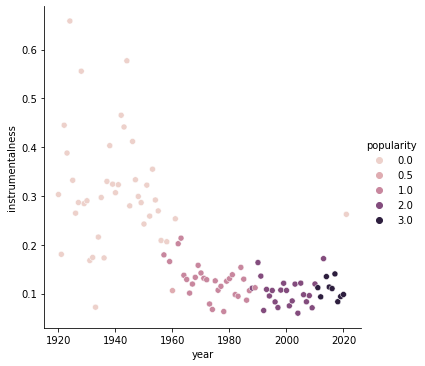

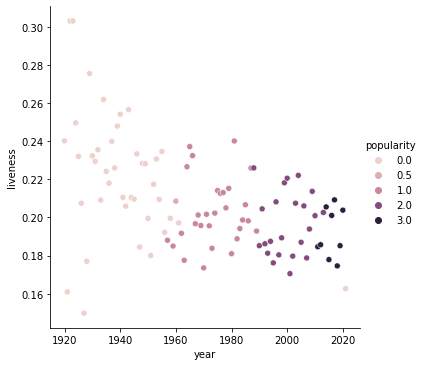

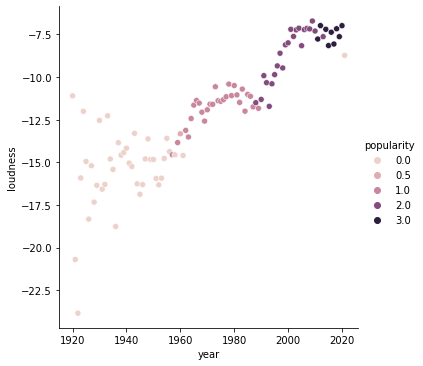

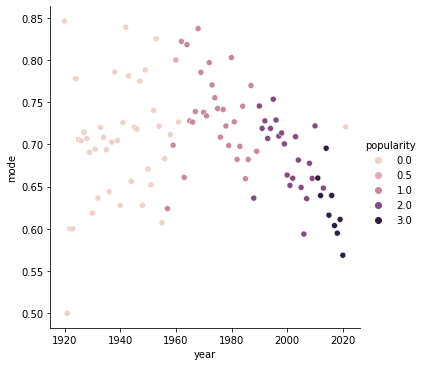

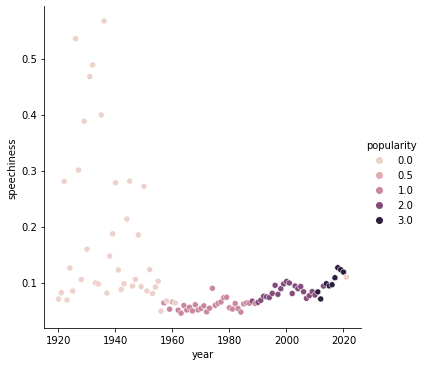

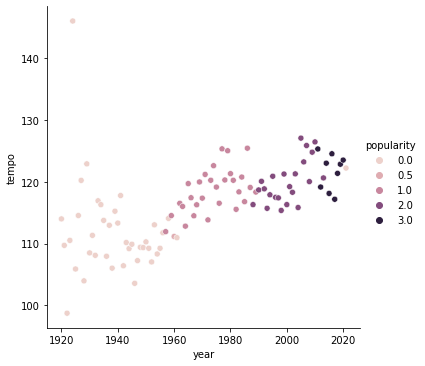

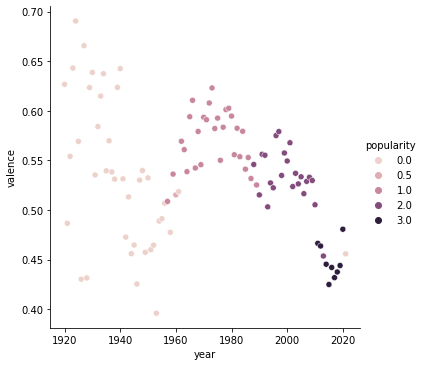

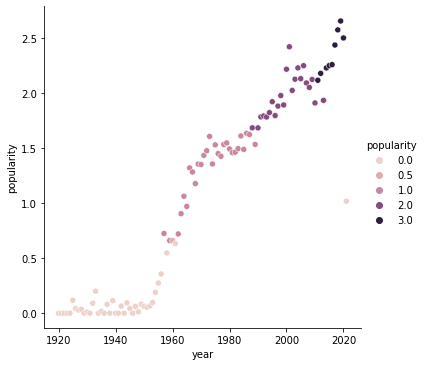

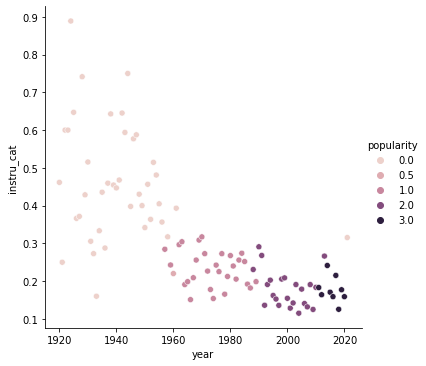

In [53]:
for i, col_name in  enumerate(df.drop('release_date', axis = 1).columns):
    if col_name == 'year':
        continue
    #plt.figure(figsize = (8, 8))
    #palette = sns.color_palette("bright")
    sns.relplot(x = df.groupby('year').mean().index, y = df.groupby('year').mean()[col_name],
                hue = df.groupby('year').median()['popularity'])
               

In [54]:
## lets extract months from release_date

In [55]:
df['month'] = df['release_date'].map(lambda x : int(x.split('-')[1]))

In [56]:
df.corr()['popularity'].sort_values()

acousticness       -0.407964
instrumentalness   -0.317268
instru_cat         -0.310855
speechiness        -0.122614
liveness           -0.103116
mode               -0.039218
valence            -0.005329
tempo               0.076751
month               0.171165
danceability        0.220554
explicit            0.260153
energy              0.327218
loudness            0.413219
year                0.635493
popularity          1.000000
Name: popularity, dtype: float64

<AxesSubplot:xlabel='month', ylabel='count'>

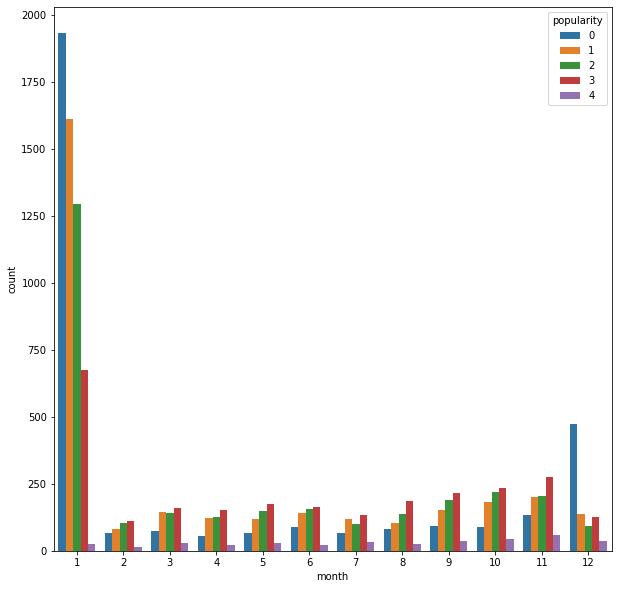

In [57]:
plt.figure(figsize = (10, 10))
sns.countplot(x = df['month'], hue = df['popularity'])

## here we see 1,  12 month follow same behaviour and rest other also follow a differnt similar behaviour so lets categorize them

In [58]:
df['month_cat'] = df['month'].map(lambda x : 1 if x == 1 or x == 12 else 0)

In [59]:
df.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,popularity,instru_cat,month,month_cat
0,0.949,0.235,0.0276,0,0.9270,0.513,-27.398,1,01-01-1947,0.0381,110.838,0.0398,1947,0,1,1,1
1,0.855,0.456,0.4850,0,0.0884,0.151,-10.046,1,13-11-2020,0.0437,152.066,0.8590,2020,1,1,11,0
2,0.827,0.495,0.4990,0,0.0000,0.401,-8.009,0,01-01-1950,0.0474,108.004,0.7090,1950,0,0,1,1
3,0.654,0.643,0.4690,0,0.1080,0.218,-15.917,1,30-04-1974,0.0368,83.636,0.9640,1974,1,1,4,0
4,0.738,0.705,0.3110,0,0.0000,0.322,-12.344,1,01-01-1973,0.0488,117.260,0.7850,1973,2,0,1,1


In [60]:
def year_bin_func(element):
    if element <= 1960 : # very old category
        return 0
    elif element > 1960 and element <= 1985: # old
        return 1
    elif element > 1985 and element <= 2010: # new
        return 2
    elif element > 2010:
        return 3

In [61]:
df['year_bin'] = df['year'].map(year_bin_func)

In [62]:
df.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,popularity,instru_cat,month,month_cat,year_bin
0,0.949,0.235,0.0276,0,0.9270,0.513,-27.398,1,01-01-1947,0.0381,110.838,0.0398,1947,0,1,1,1,0
1,0.855,0.456,0.4850,0,0.0884,0.151,-10.046,1,13-11-2020,0.0437,152.066,0.8590,2020,1,1,11,0,3
2,0.827,0.495,0.4990,0,0.0000,0.401,-8.009,0,01-01-1950,0.0474,108.004,0.7090,1950,0,0,1,1,0
3,0.654,0.643,0.4690,0,0.1080,0.218,-15.917,1,30-04-1974,0.0368,83.636,0.9640,1974,1,1,4,0,1
4,0.738,0.705,0.3110,0,0.0000,0.322,-12.344,1,01-01-1973,0.0488,117.260,0.7850,1973,2,0,1,1,1


In [63]:
def month_bin_func(element):
    if element == 1 or element == 2 or element == 12 : # winter
        return 0
    elif element > 2 and element < 6 : # spring
        return 1
    elif element >= 6 and element < 9 : # summer
        return 2
    elif element >= 9 and element< 12: #autumn
        return 3

In [64]:
df['month_bin'] = df['month'].map(month_bin_func)

In [67]:
df.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,year,popularity,instru_cat,month,month_cat,year_bin,month_bin
0,0.949,0.235,0.0276,0,0.9270,0.513,-27.398,1,0.0381,110.838,0.0398,1947,0,1,1,1,0,0
1,0.855,0.456,0.4850,0,0.0884,0.151,-10.046,1,0.0437,152.066,0.8590,2020,1,1,11,0,3,3
2,0.827,0.495,0.4990,0,0.0000,0.401,-8.009,0,0.0474,108.004,0.7090,1950,0,0,1,1,0,0
3,0.654,0.643,0.4690,0,0.1080,0.218,-15.917,1,0.0368,83.636,0.9640,1974,1,1,4,0,1,1
4,0.738,0.705,0.3110,0,0.0000,0.322,-12.344,1,0.0488,117.260,0.7850,1973,2,0,1,1,1,0


In [66]:
df = df.drop('release_date', axis = 1)

###  Now lets take diffrent features into different df for evaluation

In [68]:
df1 = df.drop(['instru_cat', 'year_bin', 'month_bin', 'month_cat'], axis = 1)
df2 = df.drop(['instrumentalness', 'year_bin', 'month_bin', 'month_cat'], axis = 1)
df3 = df.drop(['instru_cat', 'year', 'month_bin', 'month_cat'], axis = 1)
df4 = df.drop(['instru_cat', 'year_bin', 'month', 'month_cat'], axis = 1)
df5 = df.drop(['instru_cat', 'year_bin', 'month_bin', 'month'], axis = 1)
df6 = df.drop(['instrumentalness', 'year', 'month_bin', 'month'], axis = 1)
df7 = df.drop(['instrumentalness', 'year', 'month_cat', 'month'], axis = 1)

## Now lets normalize our dataset by our custom function

In [69]:
def normalize_data_func(col_names, df): # it receives set of columns names to be norrmalized
  print('Columns normalized')
  for col in col_names:
    print(col)
    mean = np.mean(df[col].values)
    std = np.std(df[col].values)

    def map_func(element):
      return (element-mean)/std
  
    df[col] = df[col].map(map_func)

  return df

In [70]:
df.columns

Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'year', 'popularity', 'instru_cat', 'month',
       'month_cat', 'year_bin', 'month_bin'],
      dtype='object')

In [71]:
for DF in [df1, df2, df3, df4, df5, df6, df7]:
    col_names = []
    for colname in DF.columns:
        if (colname != 'month_cat' and colname != 'month_bin' and colname != 'year_bin' and colname != 'month'
            and colname != 'mode' and colname != 'explicit' and colname != 'popularity' and colname != 'instru_cat'):
            
            col_names.append(colname)
            
    DF = normalize_data_func(col_names, DF)

Columns normalized
acousticness
danceability
energy
instrumentalness
liveness
loudness
speechiness
tempo
valence
year
Columns normalized
acousticness
danceability
energy
liveness
loudness
speechiness
tempo
valence
year
Columns normalized
acousticness
danceability
energy
instrumentalness
liveness
loudness
speechiness
tempo
valence
Columns normalized
acousticness
danceability
energy
instrumentalness
liveness
loudness
speechiness
tempo
valence
year
Columns normalized
acousticness
danceability
energy
instrumentalness
liveness
loudness
speechiness
tempo
valence
year
Columns normalized
acousticness
danceability
energy
liveness
loudness
speechiness
tempo
valence
Columns normalized
acousticness
danceability
energy
liveness
loudness
speechiness
tempo
valence


In [21]:
df = normalize_data_func(col_names, df)

Columns normalized
acousticness
danceability
energy
instrumentalness
liveness
loudness
speechiness
year
tempo
valence
month


In [22]:
df.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,month,month_cat,year_bin,month_bin
0,0.518422,-0.321353,-0.494529,0,0.777679,0.311635,-16.729313,1,01-01-1947,-0.05958,-7.329495,-0.4855,-37.517298,3.0,0,-3.682506,1,0,0
1,0.424422,-0.100353,-0.037129,0,-0.060921,-0.050365,0.622687,1,13-11-2020,-0.05398,33.898505,0.3337,35.482702,2.4,1,6.317494,0,3,3
2,0.396422,-0.061353,-0.023129,0,-0.149321,0.199635,2.659687,0,01-01-1950,-0.05028,-10.163495,0.1837,-34.517298,2.6,0,-3.682506,1,0,0
3,0.223422,0.086647,-0.053129,0,-0.041321,0.016635,-5.248313,1,30-04-1974,-0.06088,-34.531495,0.4387,-10.517298,2.4,1,-0.682506,0,1,1
4,0.307422,0.148647,-0.211129,0,-0.149321,0.120635,-1.675313,1,01-01-1973,-0.04888,-0.907495,0.2597,-11.517298,3.4,2,-3.682506,1,1,0


### Now we need to oversample the dataset to make balanced dataset

In [23]:
#!pip install imbalanced-learn

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
df1.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,year,popularity,month
0,1.413063,-1.832475,-1.884123,0,2.610169,1.791210,-3.038013,1,-0.382196,-0.242708,-1.880368,-1.447933,0,1
1,1.156847,-0.572249,-0.141458,0,-0.204471,-0.289484,0.113079,1,-0.346272,1.122511,1.292438,1.369410,1,11
2,1.080527,-0.349856,-0.088119,0,-0.501173,1.147460,0.482994,0,-0.322538,-0.336553,0.711480,-1.332152,0,1
3,0.608981,0.494096,-0.202417,0,-0.138687,0.095617,-0.953084,1,-0.390535,-1.143471,1.699109,-0.405902,1,4
4,0.837940,0.847644,-0.804387,0,-0.501173,0.693385,-0.304234,1,-0.313557,-0.030051,1.005832,-0.444496,2,1


In [74]:
df1 = pd.concat([df1, pd.get_dummies(df1['month'], drop_first=True)]
                  ,axis = 1)

In [76]:
smote  = SMOTE(random_state = 69)
X, y = smote.fit_resample(df1.drop(['popularity'], axis=1).values,
                          df1['popularity'].values)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 69)

## Using random forest classifier for differnt df

In [79]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( random_state=69)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

In [80]:
pred = clf.predict(X_val)

In [83]:
get_bid_percentages(y_val, pred)

(69.7, 12.7, 17.6)

In [84]:
df2.head()

,acousticness,danceability,energy,explicit,liveness,loudness,mode,speechiness,tempo,valence,year,popularity,instru_cat,month
0,1.413063,-1.832475,-1.884123,0,1.791210,-3.038013,1,-0.382196,-0.242708,-1.880368,-1.447933,0,1,1
1,1.156847,-0.572249,-0.141458,0,-0.289484,0.113079,1,-0.346272,1.122511,1.292438,1.369410,1,1,11
2,1.080527,-0.349856,-0.088119,0,1.147460,0.482994,0,-0.322538,-0.336553,0.711480,-1.332152,0,0,1
3,0.608981,0.494096,-0.202417,0,0.095617,-0.953084,1,-0.390535,-1.143471,1.699109,-0.405902,1,1,4
4,0.837940,0.847644,-0.804387,0,0.693385,-0.304234,1,-0.313557,-0.030051,1.005832,-0.444496,2,0,1


In [85]:
df2 = pd.concat([df2, pd.get_dummies(df2['month'], drop_first=True)]
                  ,axis = 1)

smote  = SMOTE(random_state = 69)
X, y = smote.fit_resample(df2.drop(['popularity'], axis=1).values,
                          df2['popularity'].values)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 69)


In [86]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( random_state=69)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

In [88]:
pred = clf.predict(X_val)
get_bid_percentages(y_val, pred) # score decreased so no need to categorize intruetalness

(69.5, 13.1, 17.4)

In [89]:
df3.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,popularity,month,year_bin
0,1.413063,-1.832475,-1.884123,0,2.610169,1.791210,-3.038013,1,-0.382196,-0.242708,-1.880368,0,1,0
1,1.156847,-0.572249,-0.141458,0,-0.204471,-0.289484,0.113079,1,-0.346272,1.122511,1.292438,1,11,3
2,1.080527,-0.349856,-0.088119,0,-0.501173,1.147460,0.482994,0,-0.322538,-0.336553,0.711480,0,1,0
3,0.608981,0.494096,-0.202417,0,-0.138687,0.095617,-0.953084,1,-0.390535,-1.143471,1.699109,1,4,1
4,0.837940,0.847644,-0.804387,0,-0.501173,0.693385,-0.304234,1,-0.313557,-0.030051,1.005832,2,1,1


In [90]:
df3 = pd.concat([df3, pd.get_dummies(df3['month'], drop_first=True), pd.get_dummies(df3['year_bin'], drop_first=True)]
                  ,axis = 1)

smote  = SMOTE(random_state = 69)
X, y = smote.fit_resample(df3.drop(['popularity'], axis=1).values,
                          df3['popularity'].values)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 69)


In [91]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( random_state=69)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

In [92]:
pred = clf.predict(X_val)
get_bid_percentages(y_val, pred) 

(69.6, 13.9, 16.5)

In [93]:
df4.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,year,popularity,month_bin
0,1.413063,-1.832475,-1.884123,0,2.610169,1.791210,-3.038013,1,-0.382196,-0.242708,-1.880368,-1.447933,0,0
1,1.156847,-0.572249,-0.141458,0,-0.204471,-0.289484,0.113079,1,-0.346272,1.122511,1.292438,1.369410,1,3
2,1.080527,-0.349856,-0.088119,0,-0.501173,1.147460,0.482994,0,-0.322538,-0.336553,0.711480,-1.332152,0,0
3,0.608981,0.494096,-0.202417,0,-0.138687,0.095617,-0.953084,1,-0.390535,-1.143471,1.699109,-0.405902,1,1
4,0.837940,0.847644,-0.804387,0,-0.501173,0.693385,-0.304234,1,-0.313557,-0.030051,1.005832,-0.444496,2,0


In [94]:
df4 = pd.concat([df4, pd.get_dummies(df4['month_bin'], drop_first=True)]
                  ,axis = 1)

smote  = SMOTE(random_state = 69)
X, y = smote.fit_resample(df4.drop(['popularity'], axis=1).values,
                          df4['popularity'].values)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 69)


In [96]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( random_state=69)
clf.fit(X_train, y_train)
pred = clf.predict(X_val)
get_bid_percentages(y_val, pred)  # performance increased on treating year as continous variable

(70.5, 11.8, 17.8)

In [97]:
df5.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,year,popularity,month_cat
0,1.413063,-1.832475,-1.884123,0,2.610169,1.791210,-3.038013,1,-0.382196,-0.242708,-1.880368,-1.447933,0,1
1,1.156847,-0.572249,-0.141458,0,-0.204471,-0.289484,0.113079,1,-0.346272,1.122511,1.292438,1.369410,1,0
2,1.080527,-0.349856,-0.088119,0,-0.501173,1.147460,0.482994,0,-0.322538,-0.336553,0.711480,-1.332152,0,1
3,0.608981,0.494096,-0.202417,0,-0.138687,0.095617,-0.953084,1,-0.390535,-1.143471,1.699109,-0.405902,1,0
4,0.837940,0.847644,-0.804387,0,-0.501173,0.693385,-0.304234,1,-0.313557,-0.030051,1.005832,-0.444496,2,1


In [98]:
#df4 = pd.concat([df4, pd.get_dummies(df4['month_bin'], drop_first=True)]
 #                 ,axis = 1)

smote  = SMOTE(random_state = 69)
X, y = smote.fit_resample(df5.drop(['popularity'], axis=1).values,
                          df5['popularity'].values)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 69)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( random_state=69)
clf.fit(X_train, y_train)
pred = clf.predict(X_val)
get_bid_percentages(y_val, pred)  # season wise catgorizing month has better performance

(70.1, 12.4, 17.5)

In [99]:
df6.head()

,acousticness,danceability,energy,explicit,liveness,loudness,mode,speechiness,tempo,valence,popularity,instru_cat,month_cat,year_bin
0,1.413063,-1.832475,-1.884123,0,1.791210,-3.038013,1,-0.382196,-0.242708,-1.880368,0,1,1,0
1,1.156847,-0.572249,-0.141458,0,-0.289484,0.113079,1,-0.346272,1.122511,1.292438,1,1,0,3
2,1.080527,-0.349856,-0.088119,0,1.147460,0.482994,0,-0.322538,-0.336553,0.711480,0,0,1,0
3,0.608981,0.494096,-0.202417,0,0.095617,-0.953084,1,-0.390535,-1.143471,1.699109,1,1,0,1
4,0.837940,0.847644,-0.804387,0,0.693385,-0.304234,1,-0.313557,-0.030051,1.005832,2,0,1,1


In [100]:
df6 = pd.concat([df6, pd.get_dummies(df6['year_bin'], drop_first=True)]
                  ,axis = 1)

smote  = SMOTE(random_state = 69)
X, y = smote.fit_resample(df6.drop(['popularity'], axis=1).values,
                          df6['popularity'].values)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 69)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( random_state=69)
clf.fit(X_train, y_train)
pred = clf.predict(X_val)
get_bid_percentages(y_val, pred)

(69.0, 14.4, 16.7)

In [101]:
df7.head()

,acousticness,danceability,energy,explicit,liveness,loudness,mode,speechiness,tempo,valence,popularity,instru_cat,year_bin,month_bin
0,1.413063,-1.832475,-1.884123,0,1.791210,-3.038013,1,-0.382196,-0.242708,-1.880368,0,1,0,0
1,1.156847,-0.572249,-0.141458,0,-0.289484,0.113079,1,-0.346272,1.122511,1.292438,1,1,3,3
2,1.080527,-0.349856,-0.088119,0,1.147460,0.482994,0,-0.322538,-0.336553,0.711480,0,0,0,0
3,0.608981,0.494096,-0.202417,0,0.095617,-0.953084,1,-0.390535,-1.143471,1.699109,1,1,1,1
4,0.837940,0.847644,-0.804387,0,0.693385,-0.304234,1,-0.313557,-0.030051,1.005832,2,0,1,0


In [102]:
df7 = pd.concat([df7, pd.get_dummies(df7['year_bin'], drop_first=True), pd.get_dummies(df7['month_bin'], drop_first=True)]
                  ,axis = 1)

smote  = SMOTE(random_state = 69)
X, y = smote.fit_resample(df7.drop(['popularity'], axis=1).values,
                          df7['popularity'].values)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 69)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( random_state=69)
clf.fit(X_train, y_train)
pred = clf.predict(X_val)
get_bid_percentages(y_val, pred)

(69.9, 13.7, 16.4)

### By intuition best performance should come from variables below

In [103]:
df8 = df.drop(['instru_cat', 'year_bin', 'month_cat', 'month_bin'], axis = 1)
df9 = df.drop(['instru_cat', 'year_bin', 'month_cat', 'month'], axis = 1)

In [104]:
for DF in [df8, df9]:
    col_names = []
    for colname in DF.columns:
        if (colname != 'month_cat' and colname != 'month_bin' and colname != 'year_bin' and colname != 'month'
            and colname != 'mode' and colname != 'explicit' and colname != 'popularity' and colname != 'instru_cat'):
            
            col_names.append(colname)
            
    DF = normalize_data_func(col_names, DF)

Columns normalized
acousticness
danceability
energy
instrumentalness
liveness
loudness
speechiness
tempo
valence
year
Columns normalized
acousticness
danceability
energy
instrumentalness
liveness
loudness
speechiness
tempo
valence
year


In [105]:
df8.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,year,popularity,month
0,1.413063,-1.832475,-1.884123,0,2.610169,1.791210,-3.038013,1,-0.382196,-0.242708,-1.880368,-1.447933,0,1
1,1.156847,-0.572249,-0.141458,0,-0.204471,-0.289484,0.113079,1,-0.346272,1.122511,1.292438,1.369410,1,11
2,1.080527,-0.349856,-0.088119,0,-0.501173,1.147460,0.482994,0,-0.322538,-0.336553,0.711480,-1.332152,0,1
3,0.608981,0.494096,-0.202417,0,-0.138687,0.095617,-0.953084,1,-0.390535,-1.143471,1.699109,-0.405902,1,4
4,0.837940,0.847644,-0.804387,0,-0.501173,0.693385,-0.304234,1,-0.313557,-0.030051,1.005832,-0.444496,2,1


In [106]:
df8 = pd.concat([df8, pd.get_dummies(df8['month'], drop_first=True)]
                  ,axis = 1)

smote  = SMOTE(random_state = 69)
X, y = smote.fit_resample(df8.drop(['popularity'], axis=1).values,
                          df8['popularity'].values)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 69)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( random_state=69)
clf.fit(X_train, y_train)
pred = clf.predict(X_val)
get_bid_percentages(y_val, pred)

(69.7, 12.7, 17.6)

In [107]:
df9.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,year,popularity,month_bin
0,1.413063,-1.832475,-1.884123,0,2.610169,1.791210,-3.038013,1,-0.382196,-0.242708,-1.880368,-1.447933,0,0
1,1.156847,-0.572249,-0.141458,0,-0.204471,-0.289484,0.113079,1,-0.346272,1.122511,1.292438,1.369410,1,3
2,1.080527,-0.349856,-0.088119,0,-0.501173,1.147460,0.482994,0,-0.322538,-0.336553,0.711480,-1.332152,0,0
3,0.608981,0.494096,-0.202417,0,-0.138687,0.095617,-0.953084,1,-0.390535,-1.143471,1.699109,-0.405902,1,1
4,0.837940,0.847644,-0.804387,0,-0.501173,0.693385,-0.304234,1,-0.313557,-0.030051,1.005832,-0.444496,2,0


In [108]:
df9 = pd.concat([df9, pd.get_dummies(df9['month_bin'], drop_first=True)]
                  ,axis = 1)

smote  = SMOTE(random_state = 69)
X, y = smote.fit_resample(df9.drop(['popularity'], axis=1).values,
                          df9['popularity'].values)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 69)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( random_state=69)
clf.fit(X_train, y_train)
pred = clf.predict(X_val)
get_bid_percentages(y_val, pred)

(70.5, 11.8, 17.8)

## df9 got the best performance which has year as contionous variable and month binned season wise

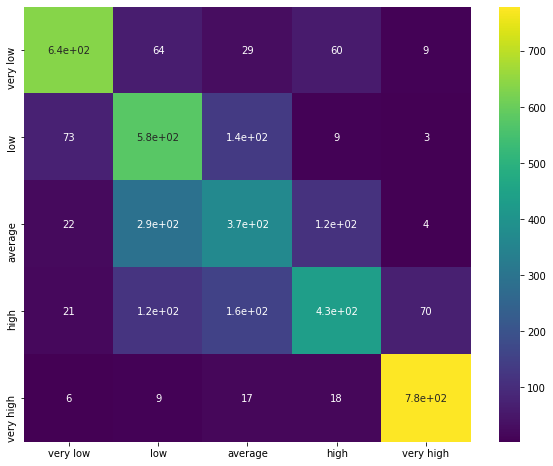

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(confusion_matrix(y_val, pred), annot = True, cmap = 'viridis', xticklabels = ['very low', 'low', 'average', 'high', 'very high'], yticklabels= ['very low', 'low' ,'average', 'high', 'very high'])

### 1) By seeing heatmap we notice we need to minimize upper half of the diagonal(because we are undervaluing the bid and trade will not occurr for it)  
### 2) Lower half of diagonal denotes overvalued buy( means we bid high price for less popular).


In [82]:
def get_bid_percentages(y_true, y_pred):
  confusion = confusion_matrix(y_true, y_pred)
  total_elements = np.sum(confusion)
  correct_bid = 0
  untraded = 0
  overvalue_bid = 0

  for i in range(5):
    for j in range(5):
      if i == j: #diagonal elements
        correct_bid += confusion[i, j]/total_elements

      elif j > i : #upper half (untraded)
        untraded += confusion[i, j]/total_elements

      else : # lowe half(overvalued bid)
        overvalue_bid += confusion[i, j]/total_elements

  return (np.round(correct_bid*100, decimals=1), np.round(untraded*100, decimals=1), np.round(overvalue_bid*100, decimals=1))

In [264]:
get_bid_percentages(y_val, pred)

(67.4, 14.8, 17.8)

### We see 69.4% are correct_bid and 12.4% tracks gets undervalued and hence untraded also 18.2% tracks gets overvalued

## Using decision tree classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 69)
tree.fit(X_train , y_train)
pred = tree.predict(X_val)

In [110]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[604  72  46  59  18]
 [ 79 403 232  73  10]
 [ 46 224 335 178  19]
 [ 62  95 183 355 106]
 [ 13  15  19  94 688]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       799
           1       0.50      0.51      0.50       797
           2       0.41      0.42      0.41       802
           3       0.47      0.44      0.46       801
           4       0.82      0.83      0.82       829

    accuracy                           0.59      4028
   macro avg       0.59      0.59      0.59      4028
weighted avg       0.59      0.59      0.59      4028



In [111]:
get_bid_percentages(y_val, pred)

(59.2, 20.2, 20.6)

### We see 60.1% are correct_bid and 20.3% tracks gets undervalued and hence untraded also 19.6% tracks gets overvalued

## Using SVM

In [112]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train ,y_train)
pred = svc.predict(X_val)

In [113]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[595  91  31  52  30]
 [ 68 571 145   8   5]
 [ 19 288 361 113  21]
 [ 17 130 168 275 211]
 [  4  26  24  42 733]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       799
           1       0.52      0.72      0.60       797
           2       0.50      0.45      0.47       802
           3       0.56      0.34      0.43       801
           4       0.73      0.88      0.80       829

    accuracy                           0.63      4028
   macro avg       0.63      0.63      0.62      4028
weighted avg       0.63      0.63      0.62      4028



In [114]:
get_bid_percentages(y_val, pred)

(62.9, 17.6, 19.5)

### We see 58.8% are correct_bid and 17.8% tracks gets undervalued and hence untraded also 23.4% tracks gets overvalued

## Using gboosting

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier(random_state = 69)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_val)

In [116]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[645  54  24  60  16]
 [ 85 578 122  10   2]
 [ 29 307 340 126   0]
 [ 23 136 185 347 110]
 [  5  22  28  70 704]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       799
           1       0.53      0.73      0.61       797
           2       0.49      0.42      0.45       802
           3       0.57      0.43      0.49       801
           4       0.85      0.85      0.85       829

    accuracy                           0.65      4028
   macro avg       0.65      0.65      0.64      4028
weighted avg       0.65      0.65      0.64      4028



In [120]:
get_bid_percentages(y_val, pred)

(64.9, 13.0, 22.1)

### We see 64.3% are correct_bid and 13.9% tracks gets undervalued and hence untraded also 21.8% tracks gets overvalued

### From above models performance we see random foresst does best in classifying the correct bid also it has owest untraded percentage

### Using NN

In [121]:
model = Sequential([Dense(64, activation='relu'),
                  Dense(64, activation='relu'),
                  Dense(32, activation='relu'),
                  Dense(16, activation='relu'),
                   Dense(5, activation='softmax')
])

In [95]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

In [122]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [123]:
hist = model.fit(X_train, y_train, epochs = 200, batch_size = 128, validation_data=(X_val, y_val))

Train on 12082 samples, validate on 4028 samples
Epoch 1/200
12082/12082 [==============================] - 2s 198us/sample - loss: 1.2957 - accuracy: 0.4392 - val_loss: 1.0949 - val_accuracy: 0.5497
Epoch 2/200
12082/12082 [==============================] - 1s 46us/sample - loss: 1.0275 - accuracy: 0.5723 - val_loss: 1.0036 - val_accuracy: 0.5824
Epoch 3/200
12082/12082 [==============================] - 1s 46us/sample - loss: 0.9591 - accuracy: 0.6026 - val_loss: 0.9536 - val_accuracy: 0.6060
Epoch 4/200
12082/12082 [==============================] - 1s 48us/sample - loss: 0.9243 - accuracy: 0.6170 - val_loss: 0.9385 - val_accuracy: 0.6152
Epoch 5/200
12082/12082 [==============================] - 1s 47us/sample - loss: 0.9053 - accuracy: 0.6247 - val_loss: 0.9218 - val_accuracy: 0.6167
Epoch 6/200
12082/12082 [==============================] - 1s 67us/sample - loss: 0.8900 - accuracy: 0.6332 - val_loss: 0.9139 - val_accuracy: 0.6169
Epoch 7/200
12082/12082 [=========================

Epoch 55/200
12082/12082 [==============================] - 1s 66us/sample - loss: 0.6341 - accuracy: 0.7327 - val_loss: 0.8068 - val_accuracy: 0.6688
Epoch 56/200
12082/12082 [==============================] - 1s 49us/sample - loss: 0.6282 - accuracy: 0.7329 - val_loss: 0.8058 - val_accuracy: 0.6639
Epoch 57/200
12082/12082 [==============================] - 1s 52us/sample - loss: 0.6229 - accuracy: 0.7417 - val_loss: 0.8063 - val_accuracy: 0.6663
Epoch 58/200
12082/12082 [==============================] - 1s 46us/sample - loss: 0.6189 - accuracy: 0.7401 - val_loss: 0.8134 - val_accuracy: 0.6636
Epoch 59/200
12082/12082 [==============================] - 1s 51us/sample - loss: 0.6217 - accuracy: 0.7346 - val_loss: 0.8214 - val_accuracy: 0.6619
Epoch 60/200
12082/12082 [==============================] - 1s 62us/sample - loss: 0.6161 - accuracy: 0.7381 - val_loss: 0.8208 - val_accuracy: 0.6666
Epoch 61/200
12082/12082 [==============================] - 1s 50us/sample - loss: 0.6120 - ac

Epoch 163/200
12082/12082 [==============================] - 1s 49us/sample - loss: 0.4514 - accuracy: 0.8147 - val_loss: 1.0245 - val_accuracy: 0.6636
Epoch 164/200
12082/12082 [==============================] - 1s 46us/sample - loss: 0.4469 - accuracy: 0.8152 - val_loss: 1.0376 - val_accuracy: 0.6604
Epoch 165/200
12082/12082 [==============================] - 1s 52us/sample - loss: 0.4625 - accuracy: 0.8120 - val_loss: 1.0365 - val_accuracy: 0.6589
Epoch 166/200
12082/12082 [==============================] - 1s 48us/sample - loss: 0.4491 - accuracy: 0.8158 - val_loss: 1.0518 - val_accuracy: 0.6596
Epoch 167/200
12082/12082 [==============================] - 1s 61us/sample - loss: 0.4415 - accuracy: 0.8171 - val_loss: 1.0421 - val_accuracy: 0.6564
Epoch 168/200
12082/12082 [==============================] - 1s 54us/sample - loss: 0.4412 - accuracy: 0.8193 - val_loss: 1.0670 - val_accuracy: 0.6616
Epoch 169/200
12082/12082 [==============================] - 1s 48us/sample - loss: 0.44

KeyboardInterrupt: 

In [124]:
from sklearn.metrics import confusion_matrix, classification_report


In [125]:
pred = model.predict_classes(X_val)

In [126]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[624  77  36  48  14]
 [ 97 487 181  26   6]
 [ 48 285 343 116  10]
 [ 26 103 189 387  96]
 [  1   3   9  15 801]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       799
           1       0.51      0.61      0.56       797
           2       0.45      0.43      0.44       802
           3       0.65      0.48      0.56       801
           4       0.86      0.97      0.91       829

    accuracy                           0.66      4028
   macro avg       0.65      0.65      0.65      4028
weighted avg       0.65      0.66      0.65      4028



In [127]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1088      
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  2080      
_________________________________________________________________
dense_3 (Dense)              multiple                  528       
_________________________________________________________________
dense_4 (Dense)              multiple                  85        
Total params: 7,941
Trainable params: 7,941
Non-trainable params: 0
_________________________________________________________________


In [128]:
get_bid_percentages(y_val, pred)

(65.6, 15.1, 19.3)

### We see 62.3% are correct_bid and 15.3% tracks gets undervalued and hence untraded also 22.4% tracks gets overvalued

#### Now we will create a custom loss function which penalizes highly for undervalues(untraded) deals


In [65]:
df.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,popularity,instru_cat,month,month_cat,year_bin,month_bin
0,0.949,0.235,0.0276,0,0.9270,0.513,-27.398,1,01-01-1947,0.0381,110.838,0.0398,1947,0,1,1,1,0,0
1,0.855,0.456,0.4850,0,0.0884,0.151,-10.046,1,13-11-2020,0.0437,152.066,0.8590,2020,1,1,11,0,3,3
2,0.827,0.495,0.4990,0,0.0000,0.401,-8.009,0,01-01-1950,0.0474,108.004,0.7090,1950,0,0,1,1,0,0
3,0.654,0.643,0.4690,0,0.1080,0.218,-15.917,1,30-04-1974,0.0368,83.636,0.9640,1974,1,1,4,0,1,1
4,0.738,0.705,0.3110,0,0.0000,0.322,-12.344,1,01-01-1973,0.0488,117.260,0.7850,1973,2,0,1,1,1,0


In [67]:
from sklearn.model_selection import train_test_split


In [68]:
# X = df.drop(['popularity', 'instrumentalness', 'release_date', 'month', 'month_bin', 'year_bin'], axis = 1)
# y = df['popularity']

In [109]:
# X_train, X_val, y_train,  y_val = train_test_split(X, y, test_size=0.25, random_state=69)

In [110]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [111]:
# def custom_loss(y_true, y_pred):

#   if tf.equal(tf.cast(y_true, tf.int64) ,tf.constant(4, tf.int64)):
#     return 5*tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)
  
#   elif tf.equal(tf.cast(y_true, tf.int64) ,tf.constant(3, tf.int64)):
#     return 4*tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

#   elif tf.equal(tf.cast(y_true, tf.int64) ,tf.constant(2, tf.int64)):
#     return 3*tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

#   elif tf.equal(tf.cast(y_true, tf.int64) ,tf.constant(1, tf.int64)):
#     return 2*tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

#   else :
#     return 1*tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)


In [112]:
def custom_loss(y_true, y_pred):
  sample_weight = y_true 
  print(  sample_weight)
  return loss(y_true, y_pred, sample_weight=sample_weight)

In [131]:
!pip install tensorflow_addons

In [133]:
# import tensorflow_addons as tfa

In [130]:
model = Sequential([Dense(64, activation='relu'),
                  Dense(64, activation='relu'),
                  Dense(32, activation='relu'),
                  Dense(16, activation='relu'),
                   Dense(5, activation='softmax')
])

In [131]:
model.compile(optimizer='adam', loss = kappa_loss, metrics = ['accuracy'] )

In [132]:
len(y_train)

9170

In [133]:
hist = model.fit(X_train.values, y_train.values, epochs = 100, batch_size=128, validation_data=(X_val.values, y_val.values))

Train on 9170 samples, validate on 3057 samples
Epoch 1/100
 128/9170 [..............................] - ETA: 5s

TypeError: Input 'y' of 'AddV2' Op has type int64 that does not match type float32 of argument 'x'.

In [ ]:
pred = model.predict_classes(X_val)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[548  79  38 115  19]
 [ 53 440 211  87   6]
 [ 13 215 374 190  10]
 [  8  74 153 448 118]
 [  0   4  11  64 750]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       799
           1       0.54      0.55      0.55       797
           2       0.48      0.47      0.47       802
           3       0.50      0.56      0.53       801
           4       0.83      0.90      0.87       829

    accuracy                           0.64      4028
   macro avg       0.64      0.63      0.64      4028
weighted avg       0.65      0.64      0.64      4028



In [ ]:
get_bid_percentages(y_val, pred)

(63.6, 21.7, 14.8)

### Pipeline and GridSearchCv

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
pipe = make_pipeline(
    SMOTE(),
    

)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator = pipe,
    param_grid = {'smote_ratio' : weights},
    scoring = 'f1',
    cv = 3
)

grid_result = gsc.fit(X_train, y_train)

print(" Best parameters : %s" % grid_result.best_params_ )
weight_f1_score_df = pd.DataFrame({
    'score': grid_result.cv_results_['mean_test_score'],
    'weight': weights
})

weight_f1_score_df.plot(x = 'weight')

TypeError: ignored

In [ ]:
from sklearn.linear_model import Logis